In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.18.0
Num GPUs Available: 1


In [2]:
# import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Divide the data into independent and dependent features
# iloc --> index location
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [7]:
# Feature Engineering
# Fixing categorical columns by using one hot encoding --> use pd.get_dummies
# Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True,dtype=int)
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)

In [8]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [9]:
# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
# Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

## Part 2 - Now let's make the ANN!


Taking entire neural network as block its called sequential --> this indicates that we would be able to do forward and backward propagation.

Dence layer is used to created neurons , input layer etc with this we will be able to create the hidden layer , input layer and output layer

Activation we will be using inside hidden layer only.

Dropout --> sometimes this entire neural network would lead to overfitting . Dropout is kind of regularization parameter

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [19]:
# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [21]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:
# Adding Output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [24]:
# Training the neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# if you wanna add learning rate then

import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])'''

Early Stop --> When accuracy is not at all increasing the training of model is stopped

In [26]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [27]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50 , callbacks=early_stopping)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7971 - loss: 0.5169 - val_accuracy: 0.7982 - val_loss: 0.4563
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8076 - loss: 0.4351 - val_accuracy: 0.8160 - val_loss: 0.4265
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8260 - loss: 0.4076 - val_accuracy: 0.8254 - val_loss: 0.4105
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8376 - loss: 0.3972 - val_accuracy: 0.8251 - val_loss: 0.3971
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8442 - loss: 0.3867 - val_accuracy: 0.8349 - val_loss: 0.3842
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8393 - loss: 0.3893 - val_accuracy: 0.8448 - val_loss: 0.3780
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8521 - loss: 0.3625 - val_accuracy: 0.8432 - val_loss: 0.3703
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.3557 - val_accuracy: 0.

In [28]:
# list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


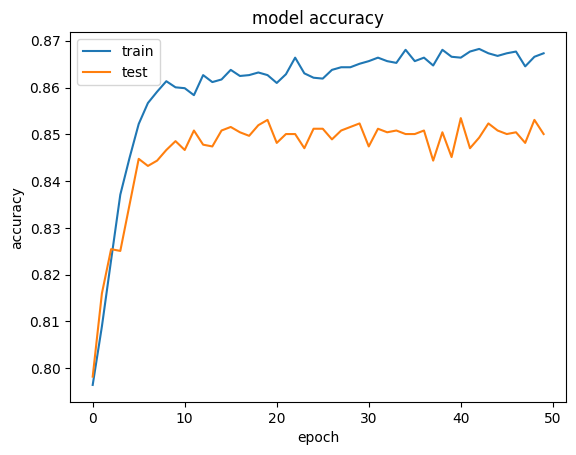

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

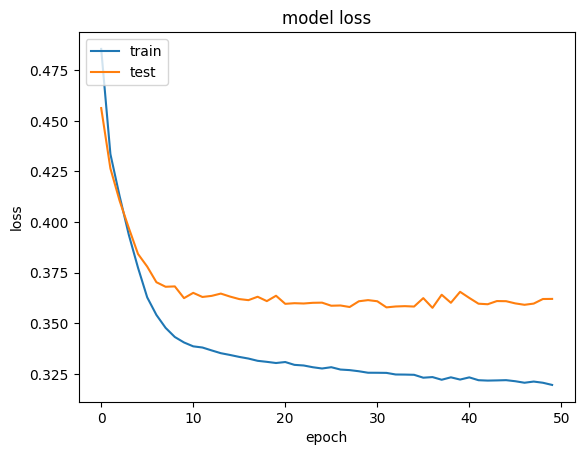

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making the predictions and evaluating the model

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1511,   84],
       [ 199,  206]])

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [34]:
score

0.8585

In [36]:
# get the weights value
classifier.get_weights()

[array([[ 0.03895944, -0.21166696,  0.29676566,  0.12636504,  0.11092305,
          0.22964792, -0.4697821 ,  0.1418894 , -0.18525049,  0.32985884,
          0.09229078],
        [ 0.8675417 ,  1.0202681 , -0.3641572 ,  0.11340462,  0.10272256,
         -0.5982405 , -0.1435904 , -0.7942861 , -0.04960648,  0.38384387,
          0.6793839 ],
        [-0.31375128,  0.2710739 , -0.08443299, -0.23734844, -0.11343838,
         -0.46593514,  0.19267565, -0.05326863,  0.07152051, -0.08577911,
         -0.08065049],
        [-0.55639684,  0.05970597, -0.26105165, -0.385242  ,  0.23075528,
         -0.0720865 , -0.02845568, -0.08866825, -0.10547559, -0.3738878 ,
          0.06289226],
        [-0.2468919 ,  0.12636107, -0.258778  , -1.2627482 ,  1.0906602 ,
         -0.20488653,  0.50844   , -0.00731756, -0.26447392,  0.31528175,
         -0.1874236 ],
        [-0.17323269, -0.3377985 ,  0.33951962,  0.19888476,  0.06552921,
          0.22805235, -0.36434585, -0.33633393, -0.09813882, -0.2054158

### If you wanna add dropout then

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))